In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
import pickle

In [2]:
train=pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [4]:
train["Cabin"].fillna("no cabin",inplace= True)
train["Age"].fillna(train["Age"].mean(),inplace= True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no cabin,S


In [5]:
train=train.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
a=pd.get_dummies(train['Pclass'])
a.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [7]:
data=pd.concat([train,a], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [8]:
b=pd.get_dummies(train['Embarked'])
b.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
data=pd.concat([data,b], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,0,1


In [10]:
c=pd.get_dummies(train['Sex'])
c.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [11]:
data=pd.concat([data,c], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,C,Q,S,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,0,1,0,1


In [12]:
data=data.drop(['Pclass','Embarked','Sex'], axis=1)
data.head()

,Survived,Age,SibSp,Parch,Fare,1,2,3,C,Q,S,female,male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [13]:
Y=data['Survived']
X=data.drop(['Survived'], axis=1)

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Amshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [16]:
filename = 'finalized_model.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[142  26]
 [ 28  72]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.73      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



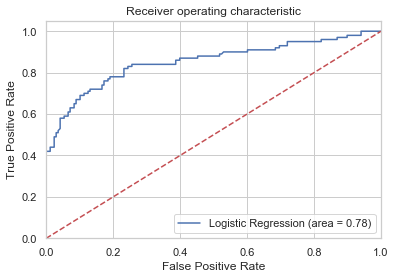

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()